In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sys

### 1) Load and Display Data → Read the dataset and print the first 5 rows.

In [2]:

df = pd.read_csv('./covid_19_country_wise_latest.csv')

In [3]:
df.head()

,Unnamed: 0,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


### 2) Set the Dataset index is Unnamed: 0

In [4]:
df.set_index('Unnamed: 0', inplace=True)

### 3)Now replace the index column Unnamed: 0 name with index

In [5]:
df.reset_index(inplace=True)

In [6]:
df.rename(columns={"Unnamed: 0": "index"}, inplace=True)

In [7]:
df.head()

,index,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


### 4) Create Function that take dataset columns and replace whitespace with Underscore and update dataset automatically and the pass the dataset.

In [8]:
def cleanWhiteSpaces(df):
    # df.columns = df.columns.str.replace(r'\s+','_',regex=True)
    df.columns = df.columns.str.replace(' ', '_')
    return df
# using the function to clean whitespaces from the dataset
df = cleanWhiteSpaces(df)

In [9]:
df.head()

,index,Country/Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,WHO_Region
0,0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


### 5) Check Basic Information → Find column names, data types, and missing values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   187 non-null    int64  
 1   Country/Region          187 non-null    object 
 2   Confirmed               187 non-null    int64  
 3   Deaths                  187 non-null    object 
 4   Recovered               187 non-null    int64  
 5   Active                  187 non-null    int64  
 6   New_cases               177 non-null    float64
 7   New_deaths              177 non-null    float64
 8   New_recovered           187 non-null    int64  
 9   Deaths_/_100_Cases      187 non-null    float64
 10  Recovered_/_100_Cases   187 non-null    float64
 11  Deaths_/_100_Recovered  187 non-null    float64
 12  Confirmed_last_week     187 non-null    int64  
 13  1_week_change           187 non-null    int64  
 14  1_week_%_increase       187 non-null    fl

In [11]:
df.describe()

C:\Users\JC\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,index,Confirmed,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase
count,187.000000,1.870000e+02,1.870000e+02,1.870000e+02,177.000000,177.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,93.000000,8.813094e+04,5.063148e+04,3.400194e+04,1282.740113,30.401130,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,54.126395,3.833187e+05,1.901882e+05,2.133262e+05,5864.213495,123.232977,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,0.000000,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,46.500000,1.114000e+03,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,93.000000,5.059000e+03,2.815000e+03,1.600000e+03,58.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,139.500000,4.046050e+04,2.260600e+04,9.149000e+03,420.000000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,186.000000,4.290259e+06,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


### 6) fill the nan values with the mean of the column

In [12]:
df.fillna(df.mean(numeric_only=True),inplace=True)

### 7) Count the number of unique countries in the dataset.

In [13]:
uniqueCountryNames = df['Country/Region'].nunique()
uniqueCountryNames

187

### 8)  Check if there are any duplicate country entries and remove them if needed.


In [14]:
duplicate_Countries = df[df.duplicated(subset=['Country/Region'],keep=False)]
duplicate_Countries 

if not duplicate_Countries.empty:
    print("Duplicated countries/Region found. Removing them.")
    df = df.drop_duplicates(subset=['Country/Region'], keep='first')
else:
    print("No duplicate Country Or Region Entries found.")

No duplicate Country Or Region Entries found.


### 9) Find the mean, median, and standard deviation of total cases.

In [22]:
#already in numeric so just find mean median & STD
mean_Confirmed = df['Confirmed'].mean()
median_Confirmed = df['Confirmed'].median()
std_Confirmed = df['Confirmed'].std()
print(f"The mean of Confirmed Cases are {mean_Confirmed:.2f}")
print(f"The median of Confirmed Cases are {median_Confirmed:.2f}")
print(f"The standard deviation of Confirmed Cases are {std_Confirmed:.2f}")

The mean of Confirmed Cases are 88130.94
The median of Confirmed Cases are 5059.00
The standard deviation of Confirmed Cases are 383318.66


### 10) Find out the string in Deaths Column and replace it with the mean of Deaths column.

In [30]:
df['Deaths'] = pd.to_numeric(df['Deaths'],errors='coerce')
meanDeaths = df['Deaths'].mean()
df.fillna({'Deaths':round(meanDeaths,2)},inplace=True)
df['Deaths']

0      1269.00
1       144.00
2      1163.00
3        52.00
4        41.00
        ...   
182      78.00
183       1.00
184     483.00
185     140.00
186    3516.13
Name: Deaths, Length: 187, dtype: float64

### 11) Change the datatype of column Deaths

In [35]:
#as we can see the datatype of Death COl is float above let change it back to Numeric int64
df['Deaths'] =df['Deaths'].astype('int')

In [37]:
df.head()

,index,Country/Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,WHO_Region
0,0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


### 12) Calculate total number of Death and Recovery all over the world

In [41]:
# Lets use the sum method to get the total from each column
total_Deaths = df['Deaths'].sum()
total_Recovered = df['Recovered'].sum()

print(f"The total deaths in the pandemic is : {total_Deaths}")
print(f"The total Recoveries in the pandemic is : {total_Recovered}")
# df['Confirmed'].sum()

The total deaths in the pandemic is : 657516
The total Recoveries in the pandemic is : 9468087


### 13) How many countries have more than 1 million total cases

In [62]:
df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce')
OneMPlusCases = df[df['Confirmed'] > 1_000_000]['Country/Region'].nunique()
print(f"Total {OneMPlusCases} Countries have more than 1M Cases.")

Total 3 Countries have more than 1M Cases.


### 14) Which countries have a recovery rate (Recovered / Total Cases) above 95%

In [71]:
# df[df['Confirmed'] ==0]
df['Recovered'] = pd.to_numeric(df['Recovered'],errors='coerce')
df['Confirmed'] = pd.to_numeric(df['Confirmed'],errors='coerce')

df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed']) * 100
high_Recovery_Rate_Countires = df[df['Recovery_Rate']>95]['Country/Region']
print(f"Countires with more than 95% Recovery Rate are : {high_Recovery_Rate_Countires.tolist()}")

Countires with more than 95% Recovery Rate are : ['Brunei', 'Djibouti', 'Dominica', 'Grenada', 'Holy See', 'Iceland', 'Malaysia', 'Mauritius', 'New Zealand', 'Norway', 'Qatar', 'Taiwan*']


### 15) Drop columns name WHO Region and Confirmed

In [72]:
df.drop(columns=['WHO_Region','Confirmed'],inplace=True)
df.head()

,index,Country/Region,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,Recovery_Rate
0,0,Afghanistan,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,69.486805
1,1,Albania,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,56.250000
2,2,Algeria,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,67.339935
3,3,Andorra,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,88.533627
4,4,Angola,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,25.473684


### 16) Find the Country with the Max Deaths

In [79]:
maxDeathsCountry = df[df['Deaths'] ==df['Deaths'].max()]
maxDeathsCountry['Country/Region']

173    US
Name: Country/Region, dtype: object

### 17) Sort Countries by Deaths (Descending Order)

In [85]:
df['Deaths'] = pd.to_numeric(df['Deaths'],errors = 'coerce')

df_sorted = df.sort_values(by='Deaths',ascending=False)

df_sorted[['Country/Region', 'Deaths']].head(10)

,Country/Region,Deaths
173,US,148011
23,Brazil,87618
177,United Kingdom,45844
111,Mexico,44022
85,Italy,35112
79,India,33408
61,France,30212
157,Spain,28432
132,Peru,18418
81,Iran,15912


### 18) Make new column name Total_cases that have a sum of Deaths, Recovered , Active

In [91]:
df['Deaths'] = pd.to_numeric(df['Deaths'],errors='coerce')
df['Recovered'] = pd.to_numeric(df['Recovered'],errors='coerce')
df['Active'] = pd.to_numeric(df['Active'],errors='coerce')

df["Total_Cases"] = df['Deaths'] + df['Recovered'] + df['Active']

df[['Country/Region','Deaths','Recovered','Active','Total_Cases']].head()

,Country/Region,Deaths,Recovered,Active,Total_Cases
0,Afghanistan,1269,25198,9796,36263
1,Albania,144,2745,1991,4880
2,Algeria,1163,18837,7973,27973
3,Andorra,52,803,52,907
4,Angola,41,242,667,950


### 19) Calculate Death_Rate for Each Country (Deaths per Total Cases) by suing formula (Desths/Total_cases)*100 and save it in Dath_Rate column

In [97]:
df['Deaths'] = pd.to_numeric(df['Deaths'],errors='coerce')
df['Total_Cases'] = pd.to_numeric(df['Total_Cases'],errors='coerce')

df['Death_Rate'] = (df['Deaths']/df['Total_Cases'])*100

df[['Country/Region','Deaths','Total_Cases','Death_Rate']].head()

,Country/Region,Deaths,Total_Cases,Death_Rate
0,Afghanistan,1269,36263,3.499435
1,Albania,144,4880,2.950820
2,Algeria,1163,27973,4.157581
3,Andorra,52,907,5.733186
4,Angola,41,950,4.315789


### 20) Identify countries where total cases are increasing but death rates remain low.

In [116]:
# df.head()
deathRateTreshold = 2.0
increasing_cases_low_deaths = df[(df['1_week_change']>0)& (df['Death_Rate']<deathRateTreshold)]
result = df[['Country/Region','1_week_change','Total_Cases','Death_Rate']]
result

### 21) print head of only 2 columns Country/Region and Death_Rate

In [103]:
df[['Country/Region','Death_Rate']].head()

,Country/Region,Death_Rate
0,Afghanistan,3.499435
1,Albania,2.950820
2,Algeria,4.157581
3,Andorra,5.733186
4,Angola,4.315789


### 22) Create a scatter plot comparing total cases and total deaths.

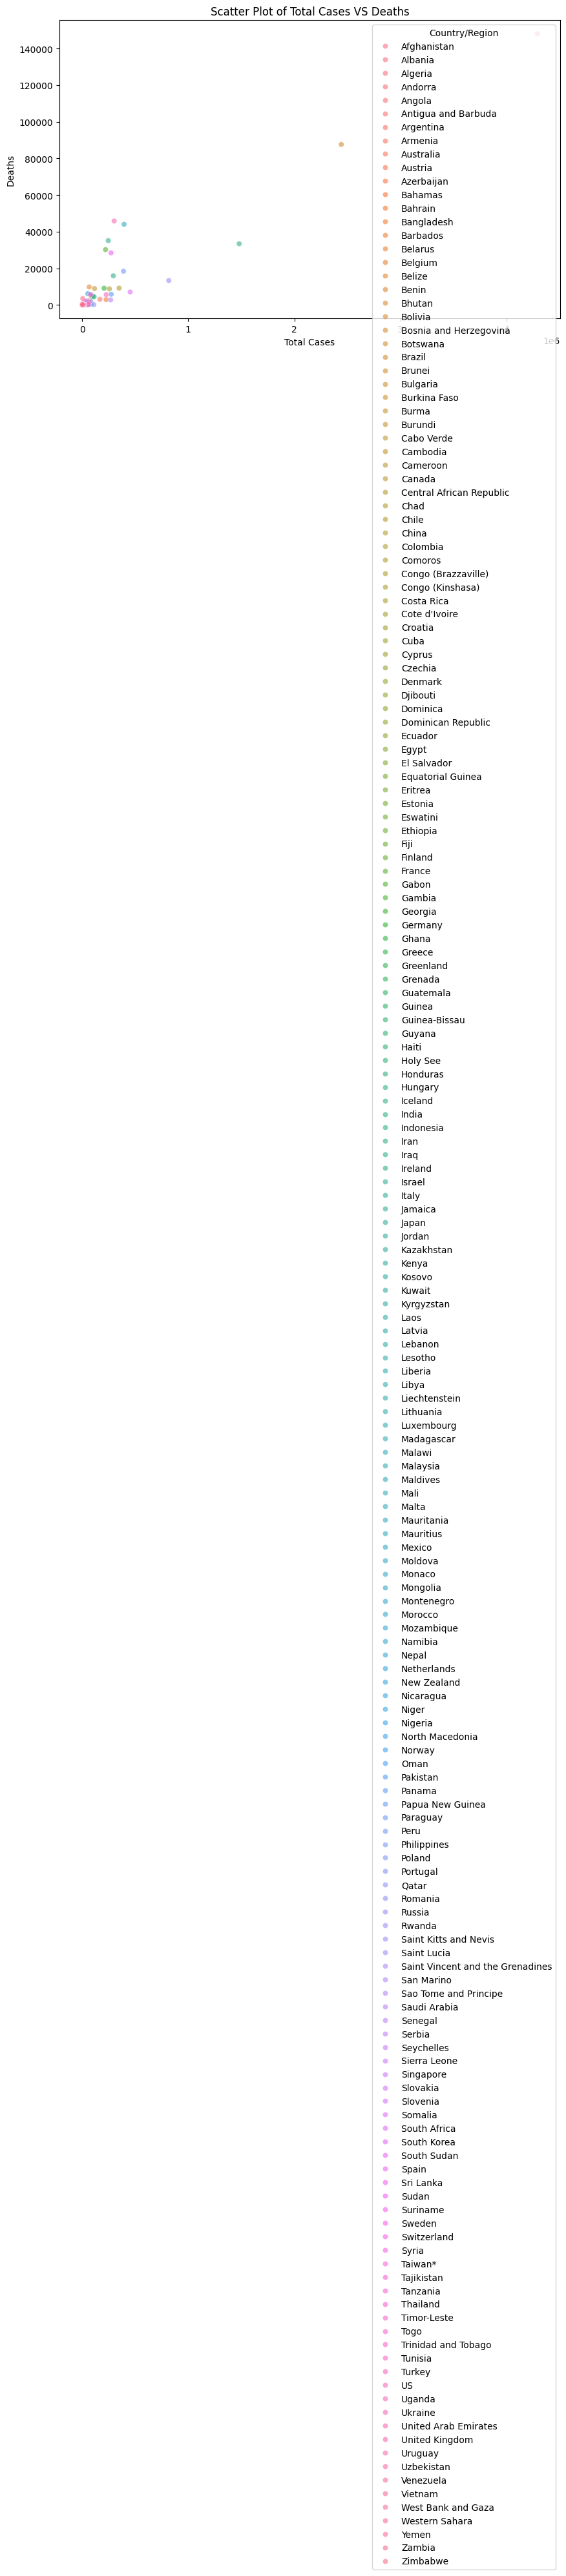

In [113]:
df['Total_Cases'] = pd.to_numeric(df['Total_Cases'],errors='coerce')
df['Deaths'] = pd.to_numeric(df['Deaths'],errors='coerce')

plt.figure(figsize=(10,6))
sys.scatterplot(data=df,x="Total_Cases",y='Deaths',hue='Country/Region',alpha=0.6)
plt.xlabel("Total Cases")
plt.ylabel("Deaths")
plt.title("Scatter Plot of Total Cases VS Deaths")
plt.show()

### 23) Save dataset in CSV format.

In [114]:
df.to_csv('Updated_Covid_Data.csv',index=False)